In [28]:
import pandas as pd
dataset = pd.read_csv("/Users/varunsatheesh/Desktop/fin-dataset_2.csv")
X = dataset[['node_type','wlan_code_index','x(m)','y(m)','primary_channel','min_channel_allowed','max_channel_allowed','RSSI','SINR','average_airtime','average_interference']].values
y = dataset['throughput'].values

In [29]:
dataset.head(100)

,Unnamed: 0,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index
0,0,AP_A,0,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,95.74500,-107.399091,0
1,1,STA_A1,1,0.0713,10.8079,4,4,5,-65.370000,29.36,5.79,95.74500,0.000000,0
2,2,STA_A2,1,1.9627,4.1427,4,4,5,-65.350000,29.48,6.11,95.74500,0.000000,0
3,3,STA_A3,1,13.7849,16.7538,4,4,5,-61.410000,31.97,6.91,95.74500,0.000000,0
4,4,STA_A4,1,6.7112,1.7487,4,4,5,-63.520000,31.26,9.99,95.74500,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,STA_G1,1,45.8872,29.1687,0,0,7,-59.220000,20.39,8.91,15.73375,0.000000,6
96,96,STA_G2,1,50.2444,39.5647,0,0,7,-70.730000,9.32,0.08,15.73375,0.000000,6
97,97,STA_G3,1,43.2143,35.6898,0,0,7,-69.490000,17.40,0.08,15.73375,0.000000,6
98,98,STA_G4,1,45.0062,36.3955,0,0,7,-68.140000,15.97,0.84,15.73375,0.000000,6


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [31]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df


,Real Values,Predicted Values
0,2.74,4.31
1,70.63,59.98
2,55.54,47.23
3,4.92,6.50
4,3.84,4.61
...,...,...
21973,12.21,22.12
21974,6.07,3.61
21975,5.28,8.07
21976,22.81,28.49


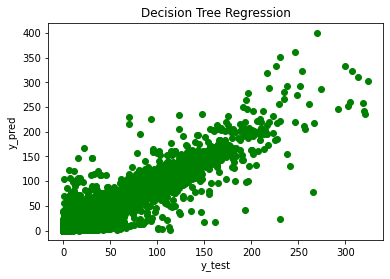

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [35]:
import sklearn.metrics as metrics
r2=metrics.r2_score(y_test,y_pred)
print(r2)

0.8680034577283571


In [36]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error testing
MSE = mean_squared_error(y_test, y_pred)
print('MSE:',MSE)

# Root Mean Squared Error
import math
RMSE = math.sqrt(MSE)
print('RMSE:',RMSE)

MSE: 103.94243900263899
RMSE: 10.195216476497151
